$~$

# IT Academy - Data Science Itinerary

$~$



## S04 T01: Access log transformations with Regular Expressions
__________

*The analyst must ensure that the registers consist of a full range of messages and are interpreted according to the context. Registration elements should be standardized, using the same terms or terminology, to elude confusion and provide cohesion.*

*As a Data Scientist you have been provided with access to the Logs-Logs where the activity of all visits to the travel agency's website "akumenius.com" is recorded*

$~$

**1 :**

$~$

**Standardize**, **identify**, and **enumerate** each of the attributes / variables in the "Web_access_log-akumenius.com" file structure that you will find in the ["Data-sources"](https://github.com/IT-Academy-BCN/Data-Science/tree/main/Data-sources) GitHub repository. 

$~$
___

In [1]:
# importing libraries
from urllib.request import urlretrieve
import py7zr
import pandas as pd
import os
import re
from datetime import datetime
import pytz
import geocoder
import folium
import time
import urllib.request
import json
import geopandas
import matplotlib.pyplot as plt


$~$

download and load the data:

$~$

In [2]:
#the copy and page the link 

URL="https://github.com/IT-Academy-BCN/Data-Science/raw/main/Data-sources/Web_access_log-akumenius.com.txt.7z"

In [3]:
# write a location for the data

PATH="./data"

$~$

we will write a fuction to download the .7z file:

$~$

In [4]:
def zip_download(url, destination_dir):

    """"download a remote .7z file
    Parameters
    ----------
    url : string
        URL of file to download
    file_path: string
       Path to the local directory where the file will download"""
    
    filepath = os.path.join(destination_dir,"zipfile")

    if not os.path.exists(filepath):
        if not os.path.exists(destination_dir):
            os.makedirs(destination_dir)
        
        urlretrieve(url, filepath)
        
        with py7zr.SevenZipFile(filepath, mode='r') as file:
            file.extractall(destination_dir)
        
    os.remove(filepath)
            
    print('Download complete!')

$~$

also a function to get the path and name of the files: 
    
$~$

In [5]:
def get_files_path(path):
    
    """get the full path of a file in a given directory
     Parameters
    ----------
    path : string
        path of the directory where the files are"""
    files = []
    for file in os.listdir(path):
        files.append(os.path.join(path,file))
    return files

$~$    

First, using *zip_download()*  we  download and unzip the .7z file. then, we get the information of those files with *get_files_path()*

$~$

In [6]:
zip_download(URL,PATH)

Download complete!


In [7]:
files = get_files_path(PATH)


In [8]:
for file in files:
    file = file

$~$

let's print few lines from the file:

$~$

In [9]:
for file in files:
    open_file = open(file)  # here our data
    print("lines from the file: "+ file)
    for i in range(5):
        line = open_file.readline()
        print(line)

        


lines from the file: ./data/Web_access_log-akumenius.com.txt
localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] "OPTIONS * HTTP/1.0" 200 - "-" "Apache (internal dummy connection)" VLOG=-

localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] "OPTIONS * HTTP/1.0" 200 - "-" "Apache (internal dummy connection)" VLOG=-

localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] "OPTIONS * HTTP/1.0" 200 - "-" "Apache (internal dummy connection)" VLOG=-

localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] "OPTIONS * HTTP/1.0" 200 - "-" "Apache (internal dummy connection)" VLOG=-

localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] "OPTIONS * HTTP/1.0" 200 - "-" "Apache (internal dummy connection)" VLOG=-



$~$

Once the lines are printed, we see  they are in the lines shows Common Log Format (CLF) :

*check [here](https://httpd.apache.org/docs/2.2/logs.html) what CLF means* 

knowing this, let's show the **log format structure**:
$~$

%h %l %u %t \"%r\" %>s %b \"%{Referer}i\" \"%{User-agent}i\

$~$

where:

+ %h is the IP address of the client (remote host);

+ %l is RFC 1413 identity (not determined);

+ %u is the user id, determined by the HTTP authentication;

+ %t is the time, by default, formatted as [day/month/year:hour:minute:second zone];

+ \"%r\" is the request string, formatted as "method resource protocol"

+ %>s is the status code;

+ %O is the request size;

+ \"%{Referer}i\" is the Referer HTTP request header and

+ \"%{User-Agent}i\" is the User-Agent HTTP request header.

$~$


$~$

to clean the dataset I will follow this [tutorial](https://mmas.github.io/read-apache-access-log-pandas)

$~$


In [10]:
def parse_str(x):
    """
    Returns the string delimited by two characters.

    Example:
        `>>> parse_str('[string]')`
        `'string'`
    """
    return x[1:-1]

def parse_datetime(x):
    '''
    Parses datetime with timezone formatted as:
        `[day/month/year:hour:minute:second zone]`

    Example:
        `>>> parse_datetime('13/Nov/2015:11:45:42 +0000')`
        `datetime.datetime(2015, 11, 3, 11, 45, 4, tzinfo=<UTC>)`

    Due to problems parsing the timezone (`%z`) with `datetime.strptime`, the
    timezone will be obtained using the `pytz` library.
    '''
    dt = datetime.strptime(x[1:-7], '%d/%b/%Y:%H:%M:%S')
    dt_tz = int(x[-6:-3])*60+int(x[-3:-1])
    return dt.replace(tzinfo=pytz.FixedOffset(dt_tz))

In [11]:
data = pd.read_csv(file,

    sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
    engine='python',
    na_values='-',
    header=None,
    usecols=[0, 1, 4, 5, 6, 7, 8, 9],
    names=['virtual_host','ip', 'time', 'request', 'status', 'size', 'referer', 'user_agent'],
    converters={'time': parse_datetime,
                'request': parse_str,
                'status': int,
                'size': int,
                'referer': parse_str,
                'user_agent': parse_str})


In [12]:
data.sample(10)


,virtual_host,ip,time,request,status,size,referer,user_agent
40967,www.akumenius.com,95.63.2.45,2014-02-24 00:19:57+01:00,GET /libraries/anythingSlider/images/2a.png HT...,200,2510,http://www.akumenius.com/,Mozilla/5.0 (Linux; U; Android 4.2.2; es-es; H...
126232,www.akumenius.com,66.249.76.216,2014-02-25 17:52:18+01:00,GET /destinos-caracteristicas/hoteles-baratos-...,200,7487,NaN,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...
228187,www.akumenius.com,81.44.3.95,2014-02-28 05:53:04+01:00,GET /includes/images/icons/bcoos_next.png HTTP...,200,663,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
79463,www.akumenius.com,66.249.76.216,2014-02-24 18:45:04+01:00,GET /destinosCaracteristicas/hoteles-baratos-e...,200,9016,NaN,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...
137458,www.akumenius.com,83.230.226.4,2014-02-25 20:33:42+01:00,GET /modules/raton/views/themes/bcoos/images/b...,200,624,http://www.akumenius.com/,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...
64639,www.akumenius.com,95.61.224.248,2014-02-24 13:11:58+01:00,GET /modules/raton/views/themes/bcoos/js/block...,200,28568,http://www.akumenius.com/hoteles-baratos/hotel...,Mozilla/5.0 (Linux; Android 4.3; es-es; SAMSUN...
42399,www.akumenius.com,95.60.0.193,2014-02-24 01:25:44+01:00,GET //libraries/anythingSlider/images/4a.png H...,200,2410,http://www.akumenius.com/,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...
71084,www.akumenius.com,83.43.71.59,2014-02-24 14:31:34+01:00,GET /escapadas/escapada-relax-hotel-vincci-cos...,200,5937,http://www.akumenius.com/escapadas/andalucia-7...,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....
220280,www.akumenius.com,81.35.188.72,2014-02-27 21:26:48+01:00,POST /destinos-get HTTP/1.1,200,207,http://www.akumenius.com/hotel-list,Mozilla/5.0 (Linux; U; Android 4.2.1; es-es; A...
71311,localhost,127.0.0.1,2014-02-24 14:40:56+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection)


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype                               
---  ------        --------------   -----                               
 0   virtual_host  261873 non-null  object                              
 1   ip            261873 non-null  object                              
 2   time          261873 non-null  datetime64[ns, pytz.FixedOffset(60)]
 3   request       261836 non-null  object                              
 4   status        261873 non-null  int64                               
 5   size          219538 non-null  object                              
 6   referer       162326 non-null  object                              
 7   user_agent    261654 non-null  object                              
dtypes: datetime64[ns, pytz.FixedOffset(60)](1), int64(1), object(6)
memory usage: 16.0+ MB


$~$

**2 :**

$~$
**Clean**, **preprocess**, **structure** and **transform** (dataframe) the data in the Web Access register.

$~$
___

In [14]:
data_ip =data["ip"].value_counts().rename_axis('ip').reset_index(name="visits")

In [15]:
data_ip.head()

,ip,visits
0,66.249.76.216,46382
1,80.28.221.123,14725
2,127.0.0.1,13892
3,217.125.71.222,5201
4,66.249.75.148,3558


$~$

as  127.0.0.1 is a localhost we don't need to use it, also let's filter our data for more that 100 visits

$~$

In [16]:
data_ip=data_ip[(data_ip["visits"]>100)&(data_ip["ip"]!='127.0.0.1')].reset_index(drop=True)

In [17]:
data_ip

,ip,visits
0,66.249.76.216,46382
1,80.28.221.123,14725
2,217.125.71.222,5201
3,66.249.75.148,3558
4,162.243.192.191,2927
...,...,...
562,5.10.83.22,101
563,217.124.183.226,101
564,208.43.248.248,101
565,194.179.87.18,101


In [18]:
data1 = []

for index, value in data_ip["ip"].items():
    with urllib.request.urlopen("https://geolocation-db.com/jsonp/"+value,timeout=500) as url:
                data = url.read().decode()
                data = data.split("(")[1].strip(")")
                data = json.loads(data)
                data1.append(data)

In [23]:
data1[0]

{'country_code': 'US',
 'country_name': 'United States',
 'city': None,
 'postal': None,
 'latitude': 37.751,
 'longitude': -97.822,
 'IPv4': '66.249.76.216',
 'state': None}

In [21]:
geolocal = pd.DataFrame(data1)

In [25]:
geolocal

,country_code,country_name,city,postal,latitude,longitude,IPv4,state
0,US,United States,None,None,37.7510,-97.8220,66.249.76.216,None
1,ES,Spain,Madrid,28045,40.4165,-3.7026,80.28.221.123,Madrid
2,ES,Spain,Bormujos,41930,37.3736,-6.0723,217.125.71.222,Seville
3,US,United States,None,None,37.7510,-97.8220,66.249.75.148,None
4,US,United States,New York,10011,40.7308,-73.9975,162.243.192.191,New York
...,...,...,...,...,...,...,...,...
562,NL,Netherlands,Amsterdam,1091,52.3556,4.9135,5.10.83.22,North Holland
563,ES,Spain,Mérida,06800,38.9161,-6.3437,217.124.183.226,Badajoz
564,US,United States,Chantilly,20151,38.8867,-77.4457,208.43.248.248,Virginia
565,ES,Spain,Arganda,28500,40.3000,-3.4667,194.179.87.18,Madrid


In [26]:
geolocal["visit"] = data_ip["visits"]

In [27]:
geolocal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  566 non-null    object 
 1   country_name  566 non-null    object 
 2   city          481 non-null    object 
 3   postal        480 non-null    object 
 4   latitude      567 non-null    float64
 5   longitude     567 non-null    float64
 6   IPv4          567 non-null    object 
 7   state         496 non-null    object 
 8   visit         567 non-null    int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 40.0+ KB


$~$

**3 :**

$~$

Geolocate IP's.

$~$

___


$~$

+ first we are going to use geopandas to create a dataframe and then to plot a map 

$~$


In [28]:
gdf = geopandas.GeoDataFrame(
    geolocal, geometry=geopandas.points_from_xy(geolocal.longitude,geolocal.latitude))


In [29]:
gdf.head()

,country_code,country_name,city,postal,latitude,longitude,IPv4,state,visit,geometry
0,US,United States,None,None,37.7510,-97.8220,66.249.76.216,None,46382,POINT (-97.82200 37.75100)
1,ES,Spain,Madrid,28045,40.4165,-3.7026,80.28.221.123,Madrid,14725,POINT (-3.70260 40.41650)
2,ES,Spain,Bormujos,41930,37.3736,-6.0723,217.125.71.222,Seville,5201,POINT (-6.07230 37.37360)
3,US,United States,None,None,37.7510,-97.8220,66.249.75.148,None,3558,POINT (-97.82200 37.75100)
4,US,United States,New York,10011,40.7308,-73.9975,162.243.192.191,New York,2927,POINT (-73.99750 40.73080)


In [30]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

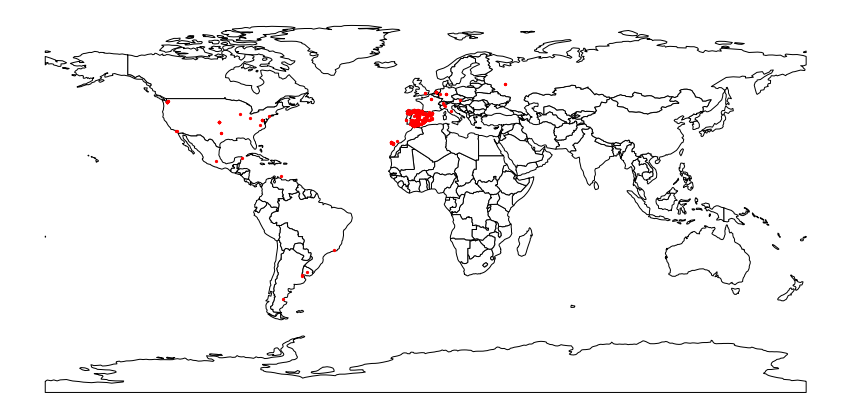

In [31]:
fig, ax = plt.subplots(figsize=(15,10))

ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='black')
ax.set_axis_off()

gdf.plot(ax=ax, marker='o', color='red', markersize=5)
plt.show()

$~$

as a first approximation it is ok, but now let's try to plot an interactive map


$~$

In [49]:
from folium.plugins import MarkerCluster

m = folium.Map(location=[40.965, -5.664], zoom_start=4)
mc = MarkerCluster()

In [50]:
for i in range(0,len(geolocal)):
    mc.add_child(folium.Marker(
        location=[geolocal.iloc[i]["latitude"],geolocal.iloc[i]["longitude"]],
        popup=geolocal.iloc[i]["IPv4"],))

In [51]:
m.add_child(mc)

In [52]:
m.save("ipsmap.html")

----------------
$~$

*references*:

+ [Print the firts n lines of file](https://www.kite.com/python/answers/how-to-print-the-first-n-lines-of-a-file-in-python)
+ [Python urllib.request.urlretrieve() Examples](https://www.programcreek.com/python/example/81585/urllib.request.urlretrieve)
+ [How to print the first n lines of a file in Python](https://www.kite.com/python/answers/how-to-print-the-first-n-lines-of-a-file-in-python)
+ [Reproducible Data Analysis in Jupyter](http://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/)
+ [Read Apache HTTP server access log with Pandas](https://mmas.github.io/read-apache-access-log-pandas)
+ []()

$~$
-------------